In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import initializers

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Replace 'path/to/your/dataset.csv' with the actual path to your CSV file in Google Drive
# df = pd.read_csv('/content/drive/My Drive/Fahmi/diabetes_skripsi.csv')

df = pd.read_csv('diabetes_skripsi.csv')
df.head()

,puskesmas,kelurahan,umur,jk,merokok,aktivitas_fisik,konsumsi_alkohol,tekanan_darah,bmi,lingkar_perut,pemeriksaan_gula,latitude,longitude,diagnosis
0,Bogor Selatan,Pamoyanan,48.0,0,0,0,0,70.0,18.73,85.0,197,-6.640877,106.793165,1
1,Bogor Selatan,Pamoyanan,75.0,0,0,0,0,70.0,21.64,80.0,155,-6.640877,106.793165,1
2,Bogor Selatan,Pamoyanan,67.0,0,0,1,0,70.0,27.68,84.0,180,-6.640877,106.793165,1
3,Bogor Selatan,Ranggamekar,42.0,0,0,0,0,88.0,31.59,93.5,210,-6.624390,106.791912,1
4,Bogor Selatan,Ranggamekar,45.0,0,0,0,0,80.0,20.94,90.0,240,-6.624390,106.791912,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   puskesmas         2091 non-null   object 
 1   kelurahan         2091 non-null   object 
 2   umur              2091 non-null   float64
 3   jk                2091 non-null   int64  
 4   merokok           2091 non-null   int64  
 5   aktivitas_fisik   2091 non-null   int64  
 6   konsumsi_alkohol  2091 non-null   int64  
 7   tekanan_darah     2091 non-null   float64
 8   bmi               2091 non-null   float64
 9   lingkar_perut     2091 non-null   float64
 10  pemeriksaan_gula  2091 non-null   int64  
 11  latitude          2091 non-null   float64
 12  longitude         2091 non-null   float64
 13  diagnosis         2091 non-null   int64  
dtypes: float64(6), int64(6), object(2)
memory usage: 228.8+ KB


In [4]:
# Delete columns 'puskesmas', 'kelurahan', 'longitude', and 'latitude'
df = df.drop(['puskesmas', 'kelurahan', 'longitude', 'latitude'], axis=1)

In [5]:
# Define features (X) and target (y)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [6]:
print(X)
print(y)

      umur  jk  merokok  aktivitas_fisik  konsumsi_alkohol  tekanan_darah  \
0     48.0   0        0                0                 0           70.0   
1     75.0   0        0                0                 0           70.0   
2     67.0   0        0                1                 0           70.0   
3     42.0   0        0                0                 0           88.0   
4     45.0   0        0                0                 0           80.0   
...    ...  ..      ...              ...               ...            ...   
2086  66.0   1        0                0                 0           70.0   
2087  75.0   1        0                0                 0           90.0   
2088  47.0   1        0                0                 0           80.0   
2089  61.0   1        0                0                 0           80.0   
2090  55.0   0        0                0                 0           80.0   

        bmi  lingkar_perut  pemeriksaan_gula  
0     18.73           85.0  

In [7]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.2962963  0.         0.         ... 0.11712623 0.08735868 0.28709056]
 [0.5462963  0.         0.         ... 0.13552998 0.08221994 0.2061657 ]
 [0.47222222 0.         0.         ... 0.17372881 0.08633094 0.25433526]
 ...
 [0.28703704 1.         0.         ... 0.13919808 0.08221994 0.22350674]
 [0.41666667 1.         0.         ... 0.21186441 0.10483042 0.20038536]
 [0.36111111 0.         0.         ... 0.15665317 0.09455293 0.14258189]]


In [8]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

In [9]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote,
                                                    y_smote,
                                                    test_size=0.1,
                                                    random_state=42)

In [10]:
# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [11]:
# Inisiasi Hyperparameter
num_neuron = 50
num_epoch = 50
num_batch = 32
optimizer = Adam(learning_rate=0.001)

# Membuat model Sequential
model = Sequential()

# Lapisan LSTM pertama
model.add(LSTM(num_neuron, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[2])))

# Lapisan LSTM kedua
model.add(LSTM(num_neuron, activation='relu', return_sequences=False))  # return_sequences=False karena lapisan ini terakhir

# Lapisan Output (misalnya untuk klasifikasi biner, gunakan 1 neuron dengan aktivasi sigmoid)
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melihat ringkasan model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=num_epoch, batch_size=num_batch, validation_split=0.2, verbose=1)

C:\ProgramData\anaconda3\envs\TF\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,251 (125.98 KB)

 Trainable params: 32,251 (125.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5951 - loss: 0.6923 - val_accuracy: 0.7190 - val_loss: 0.6867
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6941 - loss: 0.6806 - val_accuracy: 0.6885 - val_loss: 0.6396
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - loss: 0.6210 - val_accuracy: 0.7451 - val_loss: 0.4837
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7647 - loss: 0.4505 - val_accuracy: 0.9412 - val_loss: 0.2939
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9322 - loss: 0.2674 - val_accuracy: 0.9782 - val_loss: 0.1944
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9502 - loss: 0.1935 - val_accuracy: 0.9826 - val_loss: 0.1327
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9674 - loss: 0.1474 - val_accuracy: 0.9826 - val_loss: 0.1047
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9723 - loss: 0.1283 - val_accuracy: 0.9804 - val_loss:

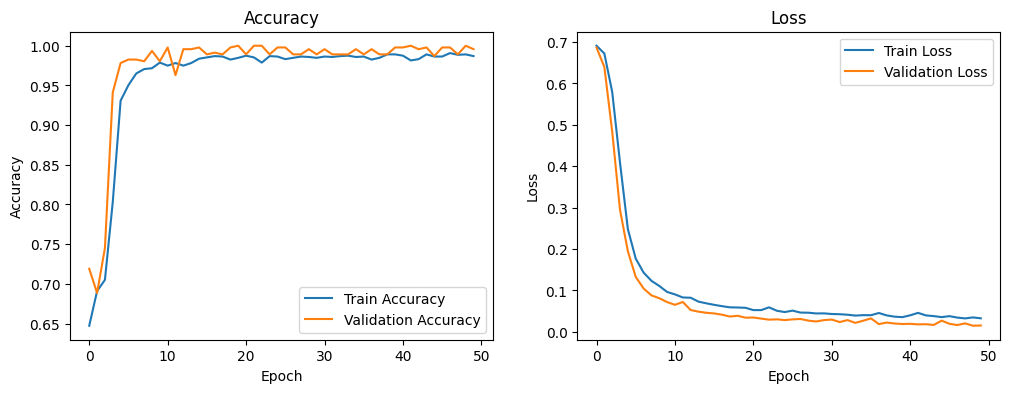

In [12]:
# Plot accuracy dan loss

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [13]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9921568632125854


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Setelah model dilatih, kita lakukan prediksi pada test set
y_pred_prob = model.predict(X_test)

# Konversi prediksi probabilitas menjadi nilai kelas biner (0 atau 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Hitung MAE, RMSE, dan MAPE berdasarkan probabilitas prediksi
mae = mean_absolute_error(y_test, y_pred_prob)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_prob))


# Print hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Mean Absolute Error (MAE): 0.021482782134499848
Root Mean Squared Error (RMSE): 0.089333101499243


In [15]:
# Misalkan data baru dalam bentuk array atau dataframe
new_data = np.array([[39, 1, 0, 0, 0, 92, 23.07, 90, 106]])

# Scale data baru dengan scaler yang sama yang digunakan pada data pelatihan
new_data_scaled = scaler.transform(new_data)

# Reshape data baru untuk menyesuaikan input LSTM (samples, timesteps, features)
new_data_scaled = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Prediksi probabilitas diabetes dengan model yang sudah dilatih
new_prediction_prob = model.predict(new_data_scaled)

# Konversi probabilitas ke prediksi kelas (0 atau 1)
new_prediction_class = (new_prediction_prob > 0.5).astype("int32")

# Tampilkan hasil prediksi
print(f"Probabilitas Diabetes: {new_prediction_prob[0][0]}")
print(f"Prediksi Kelas: {new_prediction_class[0][0]}")  # 1: Diabetes, 0: Non-Diabetes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Probabilitas Diabetes: 0.0003762255946639925
Prediksi Kelas: 0


C:\ProgramData\anaconda3\envs\TF\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
